In [22]:
import matplotlib.pyplot as plt

In [1]:
import json
import pandas as pd

# Load the JSON data
with open("Data/MS-ASL-Clean-Data/train.json", "r") as f:
    data = json.load(f)

# Convert the JSON data to a DataFrame
df = pd.DataFrame(data)

In [31]:
# Basic dataset stats
total_samples = len(df)
total_labels = df["label"].nunique()    
unique_signers = df["signer_id"].nunique()
class_counts = df["label"].value_counts().sort_index()

# Stats for signer_id 0
signer_0_df = df[df["signer_id"] == 0]
signer_0_count = len(signer_0_df)
signer_0_labels = signer_0_df["label"].nunique()
signer_0_class_counts = signer_0_df["label"].value_counts().sort_index()

# Print results
(total_samples, total_labels, signer_0_count,signer_0_labels)

(12825, 1000, 1483, 803)

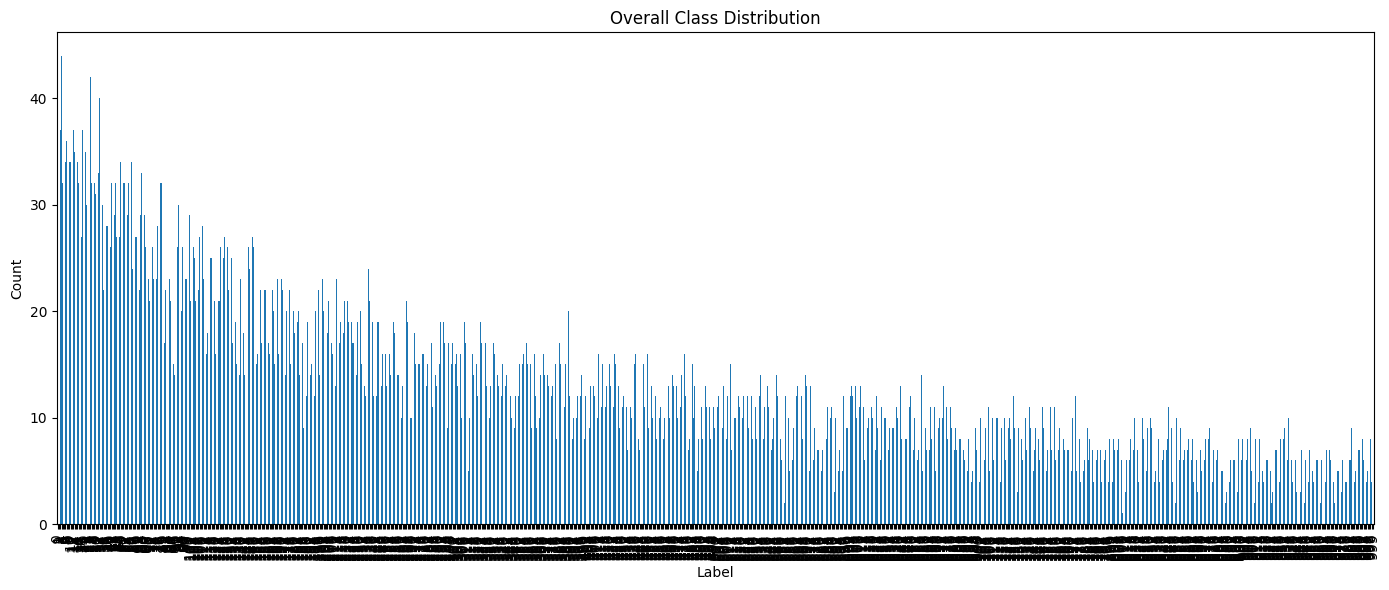

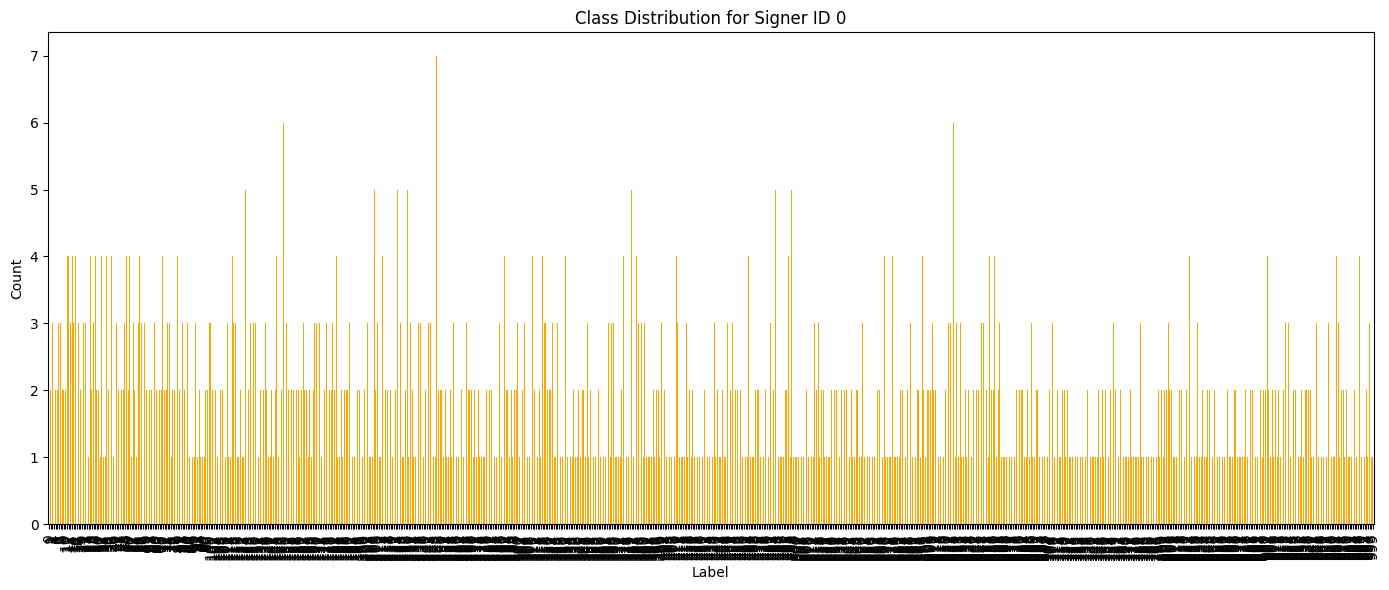

In [32]:


# Plot overall class distribution
plt.figure(figsize=(14, 6))
class_counts.plot(kind='bar')
plt.title("Overall Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot class distribution for signer_id 0
plt.figure(figsize=(14, 6))
signer_0_class_counts.plot(kind='bar', color='orange')
plt.title("Class Distribution for Signer ID 0")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [33]:
# mean, median, mode of total samples in each label
mean_samples = df.groupby("label").size().mean()
median_samples = df.groupby("label").size().median()
mode_samples = df.groupby("label").size().mode()[0]

#max samples in a label
max_samples = df.groupby("label").size().max()


(mean_samples, median_samples, mode_samples, max_samples)

(12.825, 11.0, 7, 44)

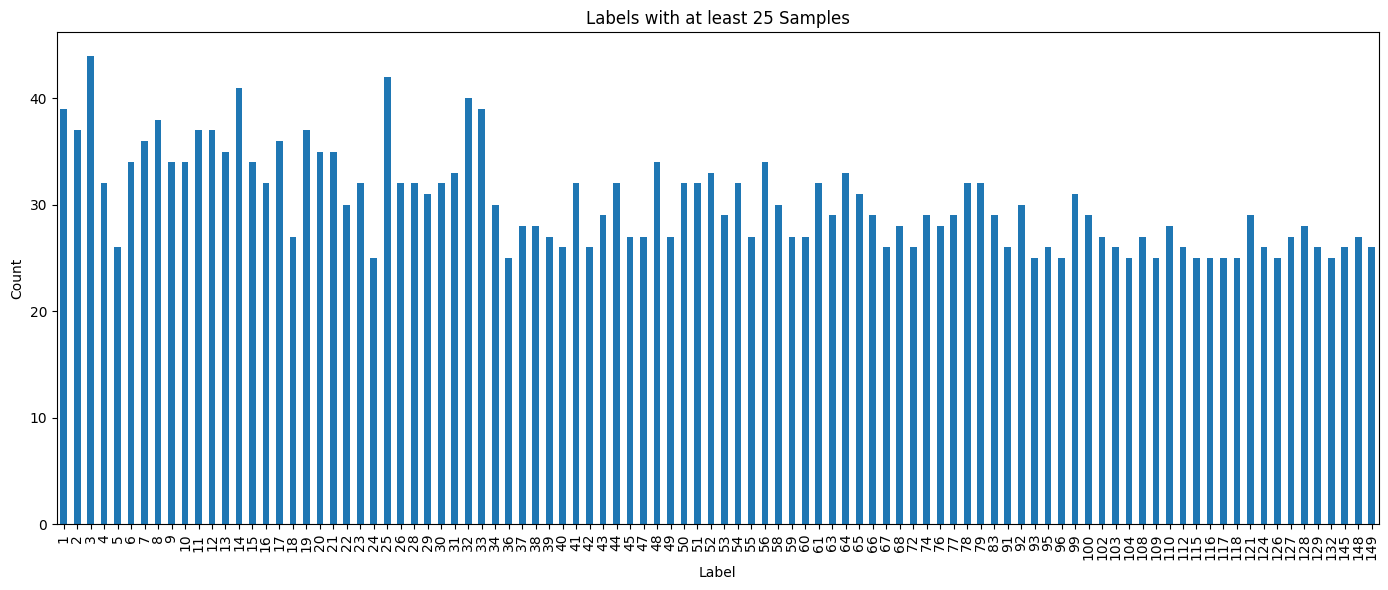

In [34]:
# create a graph of the number of samples in each label in the total dataset where label has atleast 25 samples
labels_with_25_samples = df.groupby("label").size()
labels_with_25_samples = labels_with_25_samples[labels_with_25_samples >= 25].index
labels_with_25_samples = df[df["label"].isin(labels_with_25_samples)]
labels_with_25_samples = labels_with_25_samples.groupby("label").size()
plt.figure(figsize=(14, 6))
labels_with_25_samples.plot(kind='bar')
plt.title("Labels with at least 25 Samples")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()


In [20]:
import os
import numpy as np
preprocessed_dir = "Preprocessed/Data"

labels = sorted(os.listdir(preprocessed_dir))
frame_count = []
label_count = {}
for label in labels:
    label_path = os.path.join(preprocessed_dir, label)
    files = os.listdir(label_path)
    label_count[label] = len(files)
    
    for file in files:
        file_path = os.path.join(label_path, file)
        # load numpy file
        data = np.load(file_path)
        # check the shape of the data
        frame_count.append(data.shape[0])

total_classes = len(labels)
print(total_classes)

60


In [37]:
with  open("Preprocessed/preprocessed_data.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# df.info()

total_labels = df["label"].nunique()
total_classes_preprocessed = df["label_class"].unique()
print(total_classes, total_labels, len(total_classes_preprocessed))

sample_pre_label = df["label"].value_counts().sort_index()

count_labels_less_than_25 = sample_pre_label[sample_pre_label < 25]
# print(len(count_labels_less_than_25))


60 944 944


In [39]:
with  open("Preprocessed/preprocessed_data1.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# df.info()

total_labels = df["label"].nunique()
total_classes_preprocessed = df["label_class"].unique()
print(total_classes, total_labels, len(total_classes_preprocessed))

sample_pre_label = df["label"].value_counts().sort_index()

count_labels_less_than_25 = sample_pre_label[sample_pre_label < 25]
# print(len(count_labels_less_than_25))

60 62 62


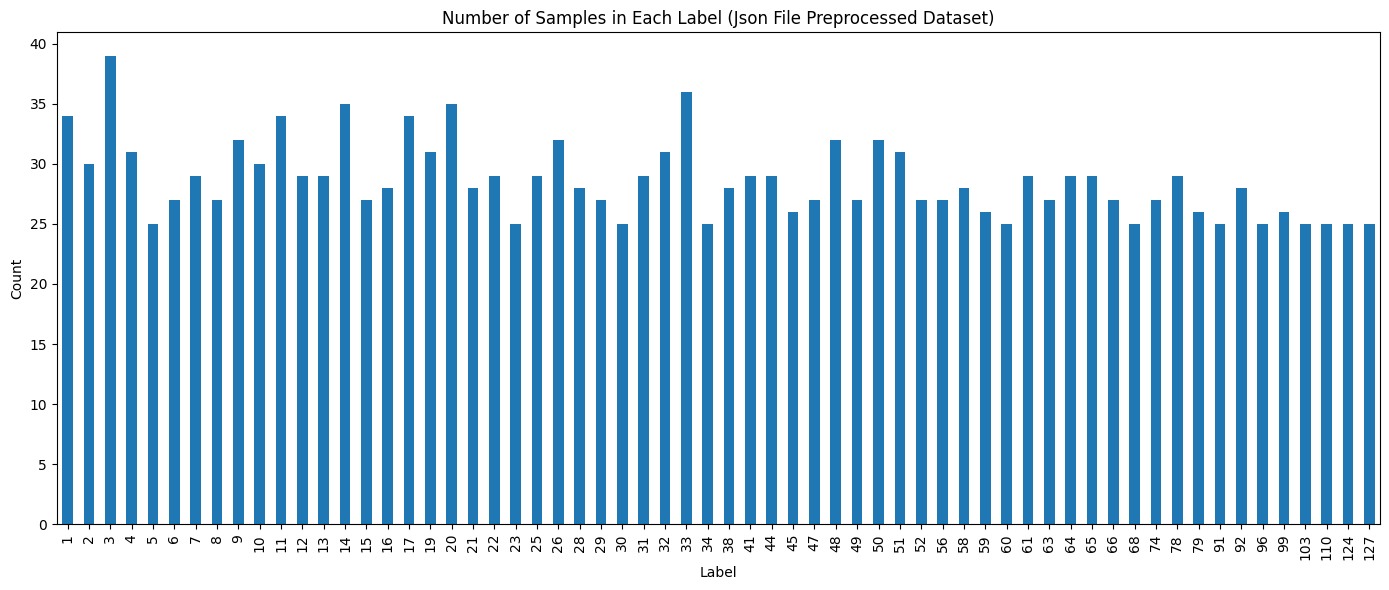

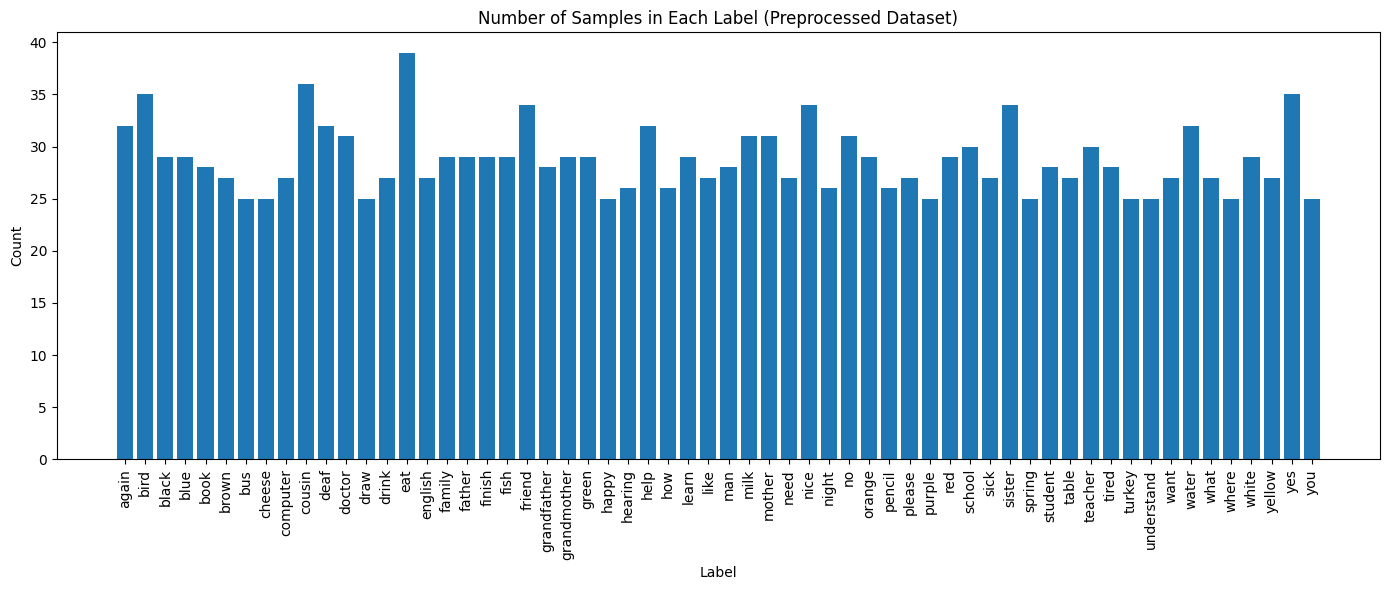

In [40]:
plt.figure(figsize=(14, 6))
sample_pre_label.plot(kind='bar')
plt.title("Number of Samples in Each Label (Json File Preprocessed Dataset)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# plot the number of samples in each label in the preprocessed dataset
plt.figure(figsize=(14, 6))
label_count = dict(sorted(label_count.items()))
plt.bar(label_count.keys(), label_count.values())
plt.title("Number of Samples in Each Label (Preprocessed Dataset)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

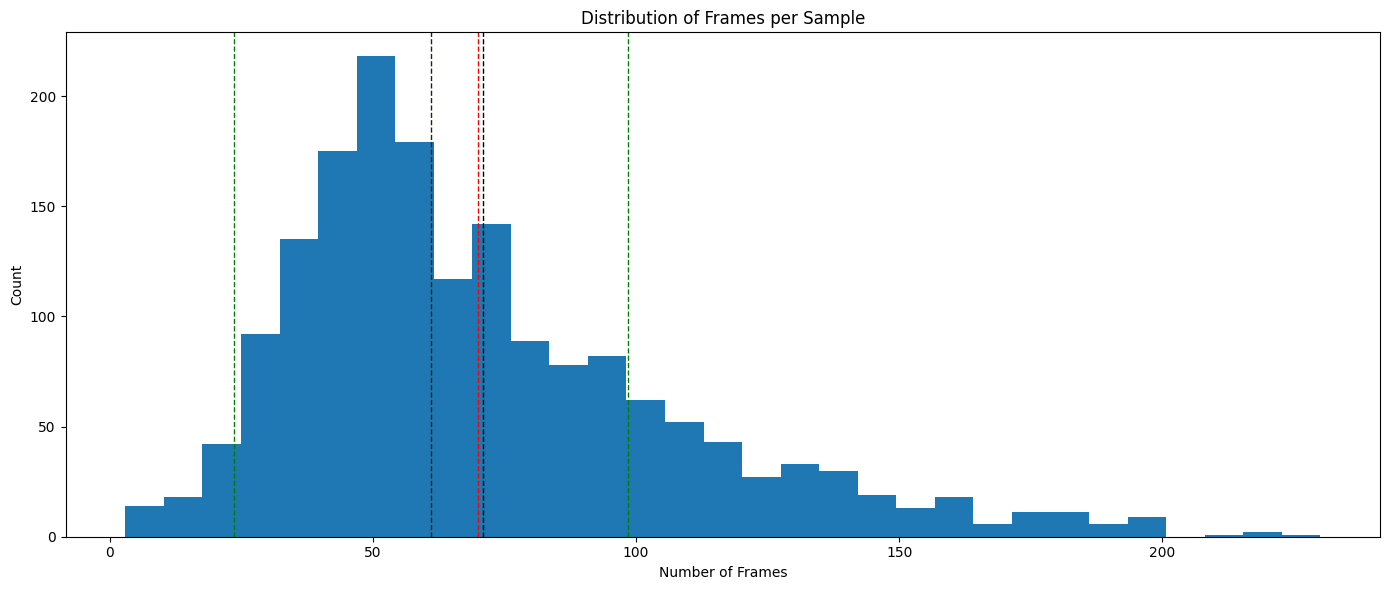

In [24]:
# plot frames per sample

# mark 1 std deviation from the mean
mean = np.mean(frame_count)
std = np.std(frame_count)
mode = np.argmax(np.bincount(frame_count))
median = np.median(frame_count)


plt.figure(figsize=(14, 6))
plt.hist(frame_count, bins='auto')
plt.title("Distribution of Frames per Sample")
plt.xlabel("Number of Frames")
plt.ylabel("Count")

# in the plot mark the mean and std
plt.axvline(mode, color='r', linestyle='dashed', linewidth=1, label='Mode')
plt.axvline(mean, color='#000000', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='#232403', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(median + std, color='g', linestyle='dashed', linewidth=1, label='Mean + 1 Std')
plt.axvline(median - std, color='g', linestyle='dashed', linewidth=1, label='Mean - 1 Std')


plt.tight_layout()
plt.show()

In [25]:
print(mean,median,mode,std)

71.00405797101449 61.0 70 37.41084839636452


In [73]:
# now i want samples that have frames in 1 std from the median of frame count

lower_bound = median - std
upper_bound = median + std
filtered_samples = []
for label in labels:
    label_path = os.path.join(preprocessed_dir, label)
    files = os.listdir(label_path)
    for file in files:
        file_path = os.path.join(label_path, file)
        # load numpy file
        data = np.load(file_path)
        # check the shape of the data
        if data.shape[0] >= lower_bound and data.shape[0] <= upper_bound:
            filtered_samples.append((label, file, data.shape[0]))

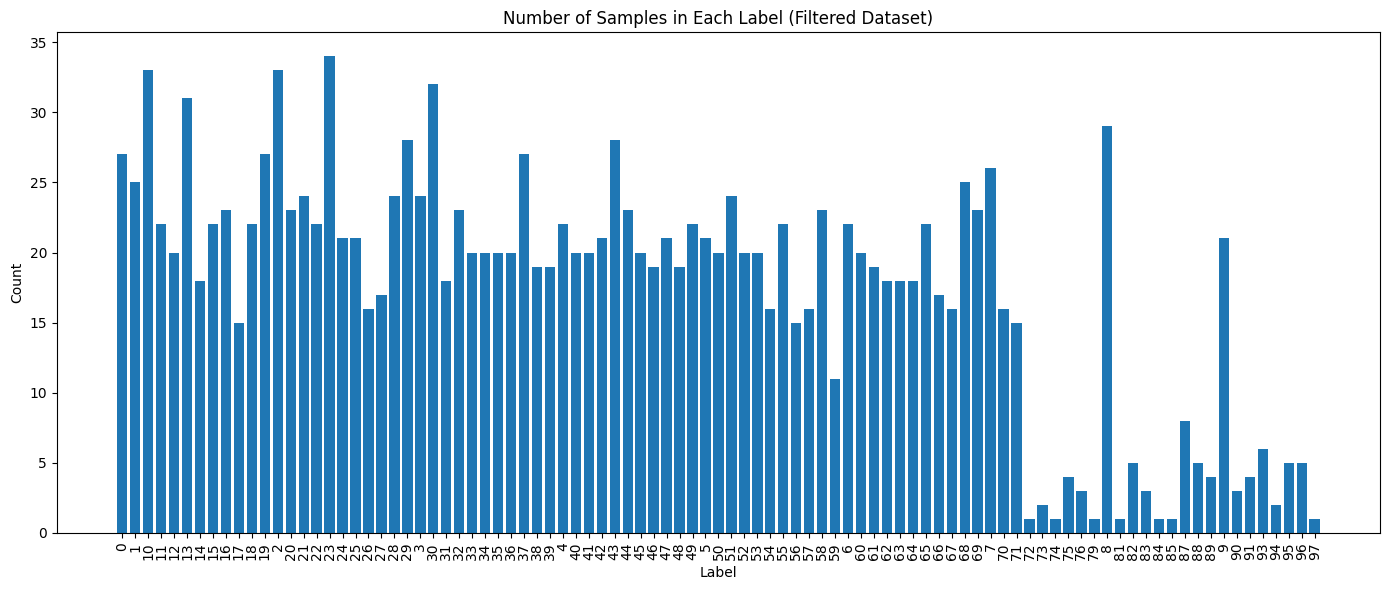

Text(0, 0.5, 'Count')

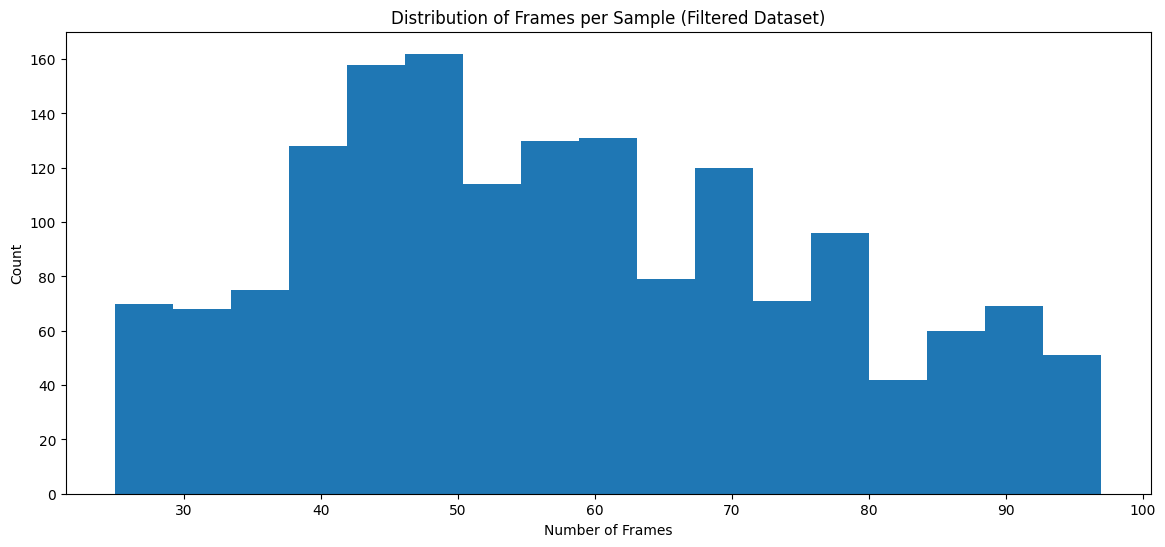

In [82]:
# give the two graphs again one with number of samples in each label and one with the distribution of frames per sample
# plot the number of samples in each label in the preprocessed dataset
label_count = {}
for label, file, frame in filtered_samples:
    if label not in label_count:
        label_count[label] = 0
    label_count[label] += 1
plt.figure(figsize=(14, 6))
label_count = dict(sorted(label_count.items()))
plt.bar(label_count.keys(), label_count.values())
plt.title("Number of Samples in Each Label (Filtered Dataset)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# plot frames per sample
plt.figure(figsize=(14, 6))
frame_count = [frame for label, file, frame in filtered_samples]
plt.hist(frame_count, bins='auto')
plt.title("Distribution of Frames per Sample (Filtered Dataset)")
plt.xlabel("Number of Frames")
plt.ylabel("Count")
# in the plot mark the mean and std

70.76532479414456


In [75]:
with open("Preprocessed/preprocessed_data.json", "r") as f:
    data = json.load(f)

# Convert the JSON data to a DataFrame
df = pd.DataFrame(data)

In [77]:
# Basic dataset stats
total_samples = len(df)
total_labels = df["label"].nunique()    
unique_signers = df["signer_id"].nunique()
class_counts = df["label"].value_counts().sort_index()

total_samples, total_labels

(1776, 62)

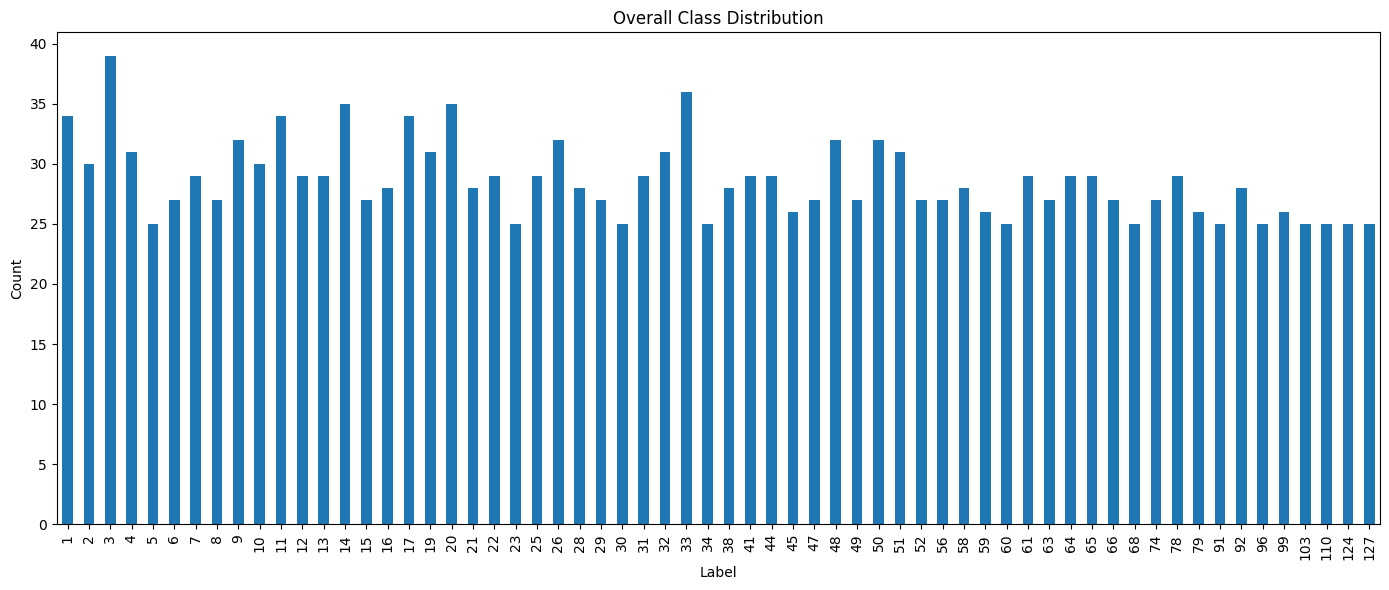

In [78]:
# Plot overall class distribution
plt.figure(figsize=(14, 6))
class_counts.plot(kind='bar')
plt.title("Overall Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [4]:
with open("Preprocessed copy/preprocessed_data.json", "r") as f:
    data = json.load(f)

pre_df = pd.DataFrame(data)

In [5]:
pre_df.head()

,org_text,clean_text,start_time,signer_id,signer,start,end,file,label,height,fps,end_time,url,text,box,width,label_class,review
0,CASHIER,cashier,35.769,9,-1,1072,1200,Community Job Signs,996,360.0,29.97,40.040,https://www.youtube.com/watch?v=G77ZoILMYw4,cashier,"[0.01247107982635498, 0.1483159065246582, 1.0,...",640.0,cashier,NaN
1,CHEF,chef,42.109,9,-1,1262,1292,Community Job Signs,778,360.0,29.97,43.110,https://www.youtube.com/watch?v=G77ZoILMYw4,chef,"[0.0, 0.0, 1.0, 0.9834142923355103]",640.0,chef,NaN
2,CHEF,chef,43.210,9,-1,1295,1327,Community Job Signs,778,360.0,29.97,44.277,https://www.youtube.com/watch?v=G77ZoILMYw4,chef,"[0.0, 0.02782195806503296, 1.0, 0.950096845626...",640.0,chef,NaN
3,CHEF,chef,44.344,9,-1,1329,1384,Community Job Signs,778,360.0,29.97,46.179,https://www.youtube.com/watch?v=G77ZoILMYw4,chef,"[0.0, 0.0, 1.0, 0.9857662916183472]",640.0,chef,NaN
4,COACH,boss,48.048,9,-1,1440,1567,Community Job Signs,337,360.0,29.97,52.285,https://www.youtube.com/watch?v=G77ZoILMYw4,boss,"[0.0, 0.024329155683517456, 1.0, 0.82717514038...",640.0,boss,NaN
